In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner
0,5,4,37,4,Home,Away,Second,First,Dec,4
1,1,14,84,7,Neutral,Neutral,First,Second,Sep,1
2,9,15,47,9,Home,Away,First,Second,Feb,9
3,7,2,102,6,Home,Away,First,Second,Aug,2
4,6,8,46,5,Home,Away,First,Second,Aug,6


In [3]:
df.isnull().sum()    # no rows with empty/missing values.

Team1            0
Team2            0
Stadium          0
HostCountry      0
Team1_Venue      0
Team2_Venue      0
Team1_Innings    0
Team2_Innings    0
MonthOfMatch     0
MatchWinner      0
dtype: int64

In [4]:
df.replace({"Team1_Venue":{'Neutral':0, 'Home':1, 'Away':2}}, inplace=True)
df.replace({"Team2_Venue":{'Neutral':0, 'Home':1, 'Away':2}}, inplace=True)
df.replace({"Team1_Innings":{'First':0, 'Second':1}}, inplace=True)
df.replace({"Team2_Innings":{'First':0, 'Second':1}}, inplace=True)
df.replace({"MonthOfMatch":{'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5, 'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}}, inplace=True)

# Converting everything to numbers as our model wouldn't understand strings.
df.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner
0,5,4,37,4,1,2,1,0,11,4
1,1,14,84,7,0,0,0,1,8,1
2,9,15,47,9,1,2,0,1,1,9
3,7,2,102,6,1,2,0,1,7,2
4,6,8,46,5,1,2,0,1,7,6


In [5]:
X = df.drop(columns=['MatchWinner'], axis=1)    # feature matrix
y = df['MatchWinner']                 # target variable

In [6]:
scaler = StandardScaler()

In [7]:
X = scaler.fit_transform(X)

In [8]:
X.shape, y.shape

((2508, 9), (2508,))

In [9]:
X_test = X[2108:]
y_test = y[2108:]

In [10]:
X_test.shape, y_test.shape

((400, 9), (400,))

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X[:2108], y[:2108], test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape 

((1686, 9), (422, 9), (1686,), (422,))

In [13]:
input_shape = [X_train.shape[1]]
print(input_shape)

[9]


In [14]:
output_shape = y.nunique()
print(output_shape)

16


In [15]:
model = Sequential()
model.add(Flatten(input_shape = input_shape))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(output_shape, activation = 'softmax'))

In [16]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [17]:
losses = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=48)

Epoch 1/100


36/36 [==============================] - 1s 13ms/step - loss: 2.5065 - accuracy: 0.1673 - val_loss: 2.2643 - val_accuracy: 0.2417
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 2.2086 - accuracy: 0.2456 - val_loss: 2.1519 - val_accuracy: 0.2488
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 2.1360 - accuracy: 0.2598 - val_loss: 2.0961 - val_accuracy: 0.2773
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 2.0740 - accuracy: 0.2805 - val_loss: 2.0635 - val_accuracy: 0.2938
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 2.0323 - accuracy: 0.2888 - val_loss: 2.0439 - val_accuracy: 0.3081
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 2.0168 - accuracy: 0.2942 - val_loss: 2.0161 - val_accuracy: 0.3318
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 1.9869 - accuracy: 0.3167 - val_loss: 1.9969 - val_accuracy: 0.3649
Epoch 8/10

In [18]:
# Accuracy of the model is really bad, i did change a lot of variables and layers, but it did not change much for the model to be good enough.

<Axes: >

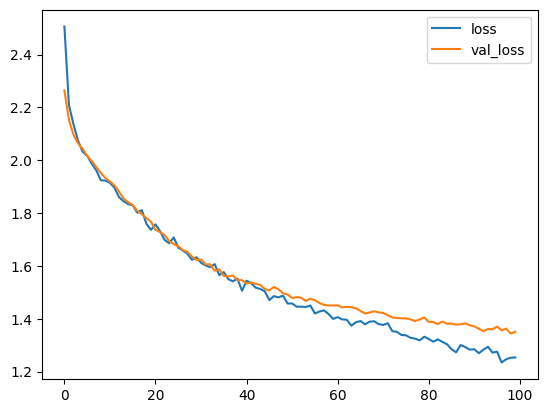

In [19]:
loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()

In [20]:
# Source - https://www.geeksforgeeks.org/implementing-neural-networks-using-tensorflow/

In [21]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

13/13 [==============================] - 0s 1ms/step


In [22]:
output_df = pd.DataFrame({'Team1':df['Team1'][2108:].values, 
                          'Team2':df['Team2'][2108:].values,
                          'Stadium':df['Stadium'][2108:].values,
                          'HostCountry':df['HostCountry'][2108:].values,
                          'Team1_Venue':df['Team1_Venue'][2108:].values,
                          'Team2_Venue':df['Team2_Venue'][2108:].values,
                          'Team1_Innings':df['Team1_Innings'][2108:].values,
                          'Team2_Innings':df['Team2_Innings'][2108:].values,
                          'MonthOfMatch':df['MonthOfMatch'][2108:].values,
                          'MatchWinner(Actual)':df['MatchWinner'][2108:].values,
                          'MatchWinner(Predicted)': predictions 
                          })
output_df.to_csv('my_submission.csv', index=False)    # to download the csv file of predictions.

In [26]:
print(classification_report(y_test, predictions, zero_division=False))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.42      0.81      0.56        48
           2       0.40      0.36      0.38        11
           4       0.48      0.46      0.47        35
           5       0.51      0.71      0.60        52
           6       0.67      0.33      0.44         6
           7       0.00      0.00      0.00         6
           8       1.00      0.50      0.67         2
           9       0.52      0.38      0.43        40
          10       0.44      0.56      0.49        50
          11       0.00      0.00      0.00         6
          12       0.70      0.37      0.48        38
          13       0.54      0.31      0.39        45
          14       0.34      0.33      0.34        42
          15       0.43      0.19      0.26        16

    accuracy                           0.47       400
   macro avg       0.43      0.35      0.37       400
weighted avg       0.47   

In [24]:
# the predictions of the model are really bad as it is sometimes predicted a team to win the match that is not even playing, 
# maybe i should have went with some binary approach instead of multiclass classification.